<a href="https://colab.research.google.com/github/EmelynMontevecchi/Buscas_Inteligencia_Artificial/blob/main/Busca_Inteligencia_artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Enunciado:
 Algoritmo de busca em largura Simples, Gulosa e A* para determinar o melhor caminho entre duas cidades na Romênia, mais especificamente de Arad até Bucareste. O critério para determinar o melhor caminho é a menor distância em linha reta até bucharest. O algoritmo deve utilizar a heurística da distância até o objetivo para guiar a busca e deve ser capaz de mostrar os vértices adjacentes de cada cidade visitada durante o processo de busca."

Implementacao - Busca Gulosa

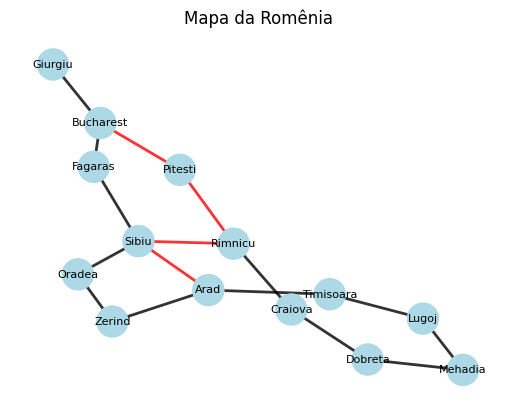

In [ ]:
# Biblioteca
import networkx as nx
import matplotlib.pyplot as plt

# Define classe Vertice.
class Vertice:
    def __init__(self, rotulo, heuristica):
        self.rotulo = rotulo
        self.visitado = False
        self.adjacentes = []
        self.heuristica = heuristica

   # Adiciona um objeto Adjacente à lista de adjacentes do vértice.
   
    def adiciona_Adj(self, adjacente):
        self.adjacentes.append(adjacente)
        self.adjacentes.sort(key=lambda x: x.vertice.heuristica)


# Define classe Adjacente.
class Adjacente:
    def __init__(self, vertice, custo):
        self.vertice = vertice
        self.custo = custo

# O objeto grafo é criado como um objeto da classe nx.Graph(), que representa o grafo da Romênia.
grafo = nx.Graph()

arad = Vertice('Arad', 366)
zerind = Vertice('Zerind', 374)
oradea = Vertice('Oradea', 380)
sibiu = Vertice('Sibiu', 253)
timisoara = Vertice('Timisoara', 329)
lugoj = Vertice('Lugoj', 244)
mehadia = Vertice('Mehadia', 241)
dobreta = Vertice('Dobreta', 242)
craiova = Vertice('Craiova', 160)
rimnicu = Vertice('Rimnicu', 193)
fagaras = Vertice('Fagaras', 178)
pitesti = Vertice('Pitesti', 98)
bucharest = Vertice('Bucharest', 0)
giurgiu = Vertice('Giurgiu', 77)

# Os vértices são conectados uns aos outros através do método adiciona_Adj, que adiciona objetos Adjacente.
arad.adiciona_Adj(Adjacente(zerind, 75))
arad.adiciona_Adj(Adjacente(sibiu, 140))
arad.adiciona_Adj(Adjacente(timisoara, 118))

zerind.adiciona_Adj(Adjacente(arad, 75))
zerind.adiciona_Adj(Adjacente(oradea, 71))

oradea.adiciona_Adj(Adjacente(zerind, 71))
oradea.adiciona_Adj(Adjacente(sibiu, 151))

sibiu.adiciona_Adj(Adjacente(oradea, 151))
sibiu.adiciona_Adj(Adjacente(arad, 140))
sibiu.adiciona_Adj(Adjacente(fagaras, 99))
sibiu.adiciona_Adj(Adjacente(rimnicu, 80))

timisoara.adiciona_Adj(Adjacente(arad, 118))
timisoara.adiciona_Adj(Adjacente(lugoj, 111))

lugoj.adiciona_Adj(Adjacente(timisoara, 111))
lugoj.adiciona_Adj(Adjacente(mehadia, 70))

mehadia.adiciona_Adj(Adjacente(lugoj, 70))
mehadia.adiciona_Adj(Adjacente(dobreta, 75))

dobreta.adiciona_Adj(Adjacente(mehadia, 75))
dobreta.adiciona_Adj(Adjacente(craiova, 120))

craiova.adiciona_Adj(Adjacente(dobreta, 120))
craiova.adiciona_Adj(Adjacente(pitesti, 138))
craiova.adiciona_Adj(Adjacente(rimnicu, 146))

rimnicu.adiciona_Adj(Adjacente(craiova, 146))
rimnicu.adiciona_Adj(Adjacente(craiova, 146))
rimnicu.adiciona_Adj(Adjacente(sibiu, 80))
rimnicu.adiciona_Adj(Adjacente(pitesti, 97))

fagaras.adiciona_Adj(Adjacente(sibiu, 99))
fagaras.adiciona_Adj(Adjacente(bucharest, 211))

pitesti.adiciona_Adj(Adjacente(rimnicu, 97))
pitesti.adiciona_Adj(Adjacente(craiova, 138))
pitesti.adiciona_Adj(Adjacente(bucharest, 101))

bucharest.adiciona_Adj(Adjacente(fagaras, 211))
bucharest.adiciona_Adj(Adjacente(pitesti, 101))
bucharest.adiciona_Adj(Adjacente(giurgiu, 90))

# Adicionando vértices e arestas ao grafo
grafo.add_edge(arad.rotulo, zerind.rotulo, weight=75)
grafo.add_edge(arad.rotulo, sibiu.rotulo, weight=130)
grafo.add_edge(arad.rotulo, timisoara.rotulo, weight=118)
grafo.add_edge(zerind.rotulo, oradea.rotulo, weight=71)
grafo.add_edge(sibiu.rotulo, oradea.rotulo, weight=151)
grafo.add_edge(sibiu.rotulo, fagaras.rotulo, weight=90)
grafo.add_edge(sibiu.rotulo, rimnicu.rotulo, weight=80)
grafo.add_edge(timisoara.rotulo, lugoj.rotulo, weight=111)
grafo.add_edge(lugoj.rotulo, mehadia.rotulo, weight=70)
grafo.add_edge(mehadia.rotulo, dobreta.rotulo, weight=75)
grafo.add_edge(dobreta.rotulo, craiova.rotulo, weight=120)
grafo.add_edge(rimnicu.rotulo, craiova.rotulo, weight=146)
grafo.add_edge(rimnicu.rotulo, pitesti.rotulo, weight=97)
grafo.add_edge(fagaras.rotulo, bucharest.rotulo, weight=211)
grafo.add_edge(pitesti.rotulo, bucharest.rotulo, weight=101)
grafo.add_edge(bucharest.rotulo, giurgiu.rotulo, weight=90)

# Definindo a posição dos vértices no layout
pos = nx.spring_layout(grafo)

# Definindo as cores dos nós e das arestas
node_colors = ['lightblue'] * len(grafo.nodes)
edge_colors = ['black'] * len(grafo.edges)

# Definindo a cor vermelha para as arestas do caminho
for i in range(len(caminho) - 1):
    arco = (caminho[i], caminho[i+1])
    edge_colors[list(grafo.edges).index(arco)] = 'red'

# Desenhando os nós
nx.draw_networkx_nodes(grafo, pos, node_color=node_colors, node_size=500)

# Desenhando as arestas
nx.draw_networkx_edges(grafo, pos, edge_color=edge_colors, width=2.0, alpha=0.8)

# Adicionando os rótulos aos nós
labels = {}
for cidade in grafo.nodes:
    labels[cidade] = cidade

nx.draw_networkx_labels(grafo, pos, labels, font_size=8)

plt.title('Mapa da Romênia')
plt.axis('off')
plt.show()


--------------------------------------------------------------------------------

### BUSCA EM ALRGURA SIMPLES

Existe um caminho entre Arad e Bucharest


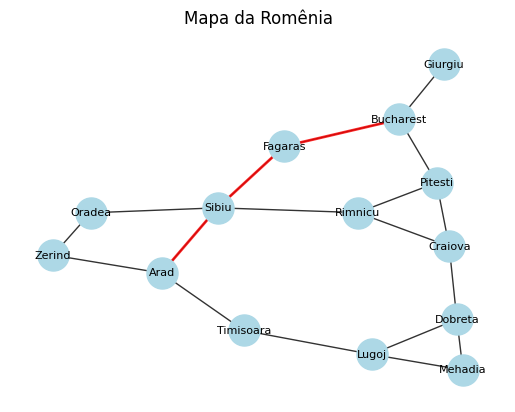

In [ ]:
# Bibliotecas.
from queue import Queue
import networkx as nx
import matplotlib.pyplot as plt

# Define a classe Vertice
class Vertice:
    def __init__(self, rotulo):
        self.rotulo = rotulo

    def __eq__(self, outro):
        return outro.rotulo == self.rotulo

    def __repr__(self):
        return self.rotulo

    def __hash__(self):
        return hash(self.rotulo)

# Define a classe Mapa.
class Mapa:
    def __init__(self):
        self.listaAdjacencias = dict()
        self.listaVertices = set()
    
    # Adiciona vértices ao mapa.
    def adicionaVertice(self, rotulo):
        self.listaVertices.add(Vertice(rotulo))

    def localizaRotulo(self, rotulo):
        for vertice in self.listaVertices:
            if vertice.rotulo == rotulo:
                return vertice
        return -1
    # Adiciona Arco ao mapa.
    def adicionaArco(self, r1, r2):
        if not self.listaAdjacencias.get(r1):
            self.listaAdjacencias[r1] = [r2]
        else:
            self.listaAdjacencias[r1].append(r2)

        if not self.listaAdjacencias.get(r2):
            self.listaAdjacencias[r2] = [r1]
        else:
            self.listaAdjacencias[r2].append(r1)

    def __repr__(self):
        return str(self.listaAdjacencias)

    def desenhaGrafo(self):
        g = Graph(comment='Romenia', strict=True)
        for vertice in self.listaVertices:
            g.node(vertice.rotulo, vertice.rotulo, fontsize="10")
        for k, v in self.listaAdjacencias.items():
            for j in v:
                g.edge(k, j, dir="none")
        return g

    def heuristica(self, cidade):
        # Por exemplo, a distância euclidiana em linha reta para Bucharest a partir de Arad
        heuristica = {
            'Arad': 366,
            'Zerind': 374,
            'Oradea': 380,
            'Sibiu': 253,
            'Timisoara': 329,
            'Lugoj': 244,
            'Mehadia': 241,
            'Dobreta': 242,
            'Craiova': 160,
            'Rimnicu': 193,
            'Fagaras': 176,
            'Pitesti': 100,
            'Bucharest': 0,
            'Giurgiu': 77
        }
        return heuristica[cidade]

    def buscaLargura(self, origem, destino):
        fila = Queue()
        visitados = set()

        fila.put(origem)
        visitados.add(origem)

        while not fila.empty():
            atual = fila.get()

            if atual == destino:
                return True

            vizinhos = self.listaAdjacencias[atual]
            for vizinho in vizinhos:
                if vizinho not in visitados:
                    fila.put(vizinho)
                    visitados.add(vizinho)

        return False

# Cria uma instância da classe Mapa chamada mp.
mp = Mapa()

mp.adicionaVertice('Arad')
mp.adicionaVertice('Zerind')
mp.adicionaVertice('Oradea')
mp.adicionaVertice('Sibiu')
mp.adicionaVertice('Timisoara')
mp.adicionaVertice('Lugoj')
mp.adicionaVertice('Mehadia')
mp.adicionaVertice('Dobreta')
mp.adicionaVertice('Craiova')
mp.adicionaVertice('Rimnicu')
mp.adicionaVertice('Fagaras')
mp.adicionaVertice('Pitesti')
mp.adicionaVertice('Bucharest')
mp.adicionaVertice('Giurgiu')

mp.adicionaArco('Arad', 'Zerind')
mp.adicionaArco('Arad', 'Sibiu')
mp.adicionaArco('Arad', 'Timisoara')

mp.adicionaArco('Zerind', 'Oradea')

mp.adicionaArco('Oradea', 'Sibiu')

mp.adicionaArco('Sibiu', 'Fagaras')
mp.adicionaArco('Sibiu', 'Rimnicu')

mp.adicionaArco('Timisoara', 'Lugoj')

mp.adicionaArco('Lugoj', 'Mehadia')
mp.adicionaArco('Lugoj', 'Dobreta')

mp.adicionaArco('Mehadia', 'Dobreta')

mp.adicionaArco('Craiova', 'Dobreta')
mp.adicionaArco('Craiova', 'Pitesti')
mp.adicionaArco('Craiova', 'Rimnicu')

mp.adicionaArco('Rimnicu', 'Sibiu')
mp.adicionaArco('Rimnicu', 'Pitesti')

mp.adicionaArco('Fagaras', 'Sibiu')
mp.adicionaArco('Fagaras', 'Bucharest')

mp.adicionaArco('Pitesti', 'Rimnicu')
mp.adicionaArco('Pitesti', 'Craiova')
mp.adicionaArco('Pitesti', 'Bucharest')

mp.adicionaArco('Bucharest', 'Fagaras')
mp.adicionaArco('Bucharest', 'Pitesti')
mp.adicionaArco('Bucharest', 'Giurgiu')

origem = 'Arad'
destino = 'Bucharest'
# Define a função buscaCidades que realiza a busca em largura no mapa (grafo).
def buscaCidades(grafo, inicio, meta):
    border = [[inicio]]
    visited = set()
   # Executa um loop enquanto houver vértices na borda.
    while border:
        route = border.pop(0)
        v = route[-1]
        # Obtém o último vértice do caminho.
        # Verifica se o vértice atual é igual ao vértice de destino.
        if v == meta:
            return route
        # Verifica se o vértice atual não foi visitado.
        elif v not in visited:
            # Obtém a lista de vértices adjacentes ao vértice atual.
            adjacentes = grafo.listaAdjacencias.get(v, [])
            for neighbour in adjacentes:
                newRoute = route + [neighbour]
                border.append(newRoute)

                if neighbour == meta:
                    return newRoute

            visited.add(v)

    return None
# Chama a função buscaCidades para encontrar o caminho entre a origem e o destino no mapa.
caminho = buscaCidades(mp, origem, destino)

# Verifica se o caminho foi encontrado.
if caminho is not None:
    print(f"Existe um caminho entre {origem} e {destino}")
else:
    print(f"Nenhum caminho encontrado entre {origem} e {destino}")



# Cria uma lista de pares de vértices consecutivos no caminho encontrado.
arcos_caminho = [(caminho[i], caminho[i+1]) for i in range(len(caminho)-1)]

# Desenhar o grafo
grafo = nx.Graph(mp.listaAdjacencias)
pos = nx.spring_layout(grafo)

# Desenhar os nós
nx.draw_networkx_nodes(grafo, pos, node_color='lightblue', node_size=500)

# Desenhar os arcos
nx.draw_networkx_edges(grafo, pos, width=1.0, alpha=0.8)

# Desenhar o caminho em vermelho
nx.draw_networkx_edges(grafo, pos, edgelist=arcos_caminho, width=2.0, alpha=0.8, edge_color='red')

# Adicionar os rótulos aos nós
labels = {}
for cidade in grafo.nodes:
    labels[cidade] = cidade

nx.draw_networkx_labels(grafo, pos, labels, font_size=8)

plt.title('Mapa da Romênia')
plt.axis('off')
plt.show()


# BUSCA A*

Caminho de Arad para Bucharest:
Arad -> Sibiu -> Rimnicu -> Pitesti -> Bucharest


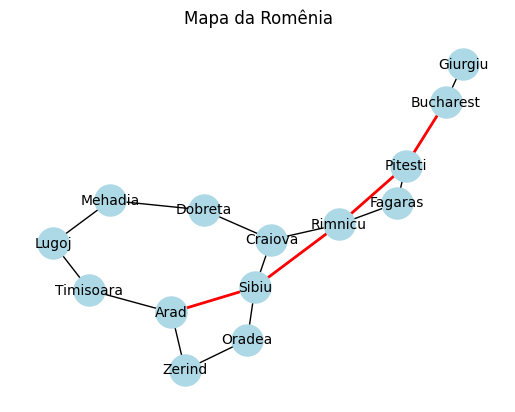

In [ ]:
# Biblioteca
from queue import PriorityQueue
import matplotlib.pyplot as plt
import networkx as nx

# Define a classe
class Mapa:
    # O método __init__
    def __init__(self):
        self.listaVertices = []
        self.listaAdjacencias = {}
    # Método que adiciona um vértice ao mapa.
    def adicionaVertice(self, rotulo):
        vertice = Vertice(rotulo)
        self.listaVertices.append(vertice)
        self.listaAdjacencias[vertice] = {}
    # Método que adiciona uma aresta (arco) entre dois vértices no mapa. 
    def adicionaArco(self, origem, destino, distancia):
        for vertice in self.listaVertices:
            if vertice.rotulo == origem:
                origem = vertice
            if vertice.rotulo == destino:
                destino = vertice
        self.listaAdjacencias[origem][destino] = distancia
        self.listaAdjacencias[destino][origem] = distancia
    # Método que localiza um vértice pelo rótulo.   
    def localizaVertice(self, rotulo):
        for vertice in self.listaVertices:
            if vertice.rotulo == rotulo:
                return vertice
        return None

    # Método que realiza a busca A* no mapa.
    def buscaAStar(self, origem, destino):
        origem = self.localizaVertice(origem)
        destino = self.localizaVertice(destino)
        if origem is None or destino is None:
            return None

        custoG = {}
        custoH = {}

        custoG[origem] = 0
        custoH[origem] = origem.heuristica(destino)

        visitados = set()
        fronteira = PriorityQueue()
        fronteira.put((custoG[origem] + custoH[origem], origem))

        while not fronteira.empty():
            _, atual = fronteira.get()

            if atual == destino:
                caminho = []
                while atual is not None:
                    caminho.append(atual.rotulo)
                    atual = atual.pai
                return caminho[::-1]

            visitados.add(atual)

            vizinhos = self.listaAdjacencias[atual]
            for vizinho in vizinhos:
                custo = custoG[atual] + self.listaAdjacencias[atual][vizinho]
                if vizinho not in custoG or custo < custoG[vizinho]:
                    custoG[vizinho] = custo
                    custoH[vizinho] = vizinho.heuristica(destino)
                    vizinho.pai = atual
                    if vizinho not in visitados:
                        fronteira.put((custoG[vizinho] + custoH[vizinho], vizinho))

        return None

# Define a classe Vertice
class Vertice:
    def __init__(self, rotulo):
        self.rotulo = rotulo
        self.pai = None
    # Define uma heurística simples para o vértice
    def heuristica(self, destino):
        # Define uma heurística simples que retorna 1 para todos os vértices
        return 1

# Cria uma instância da classe Mapa chamada mp.
mp = Mapa()

mp.adicionaVertice('Arad')
mp.adicionaVertice('Zerind')
mp.adicionaVertice('Oradea')
mp.adicionaVertice('Sibiu')
mp.adicionaVertice('Timisoara')
mp.adicionaVertice('Lugoj')
mp.adicionaVertice('Mehadia')
mp.adicionaVertice('Dobreta')
mp.adicionaVertice('Craiova')
mp.adicionaVertice('Rimnicu')
mp.adicionaVertice('Fagaras')
mp.adicionaVertice('Pitesti')
mp.adicionaVertice('Bucharest')
mp.adicionaVertice('Giurgiu')

mp.adicionaArco('Arad', 'Zerind', 75)
mp.adicionaArco('Arad', 'Sibiu', 140)
mp.adicionaArco('Arad', 'Timisoara', 118)
mp.adicionaArco('Zerind', 'Oradea', 71)
mp.adicionaArco('Oradea', 'Sibiu', 151)
mp.adicionaArco('Sibiu', 'Craiova', 99)
mp.adicionaArco('Sibiu', 'Rimnicu', 80)
mp.adicionaArco('Sibiu', 'Craiova', 146)
mp.adicionaArco('Timisoara', 'Lugoj', 111)
mp.adicionaArco('Lugoj', 'Mehadia', 70)
mp.adicionaArco('Mehadia', 'Dobreta', 75)
mp.adicionaArco('Dobreta', 'Craiova', 120)
mp.adicionaArco('Fagaras', 'Rimnicu', 146)
mp.adicionaArco('Rimnicu', 'Pitesti', 97)
mp.adicionaArco('Rimnicu', 'Craiova', 146)
mp.adicionaArco('Pitesti', 'Bucharest', 101)
mp.adicionaArco('Fagaras', 'Pitesti', 138)
mp.adicionaArco('Bucharest', 'Giurgiu', 211)

# Define a origem e o destino para a busca A*.
origem = 'Arad'
destino = 'Bucharest'

# Realiza a busca A* no mapa, utilizando a origem e o destino fornecidos, e armazena o resultado no objeto caminho.
caminho = mp.buscaAStar(origem, destino)

if caminho is not None:
    print(f"Caminho de {origem} para {destino}:")
    # Imprime o caminho encontrado
    print(" -> ".join(caminho))
else:
    print("Não há caminho possível entre a origem e o destino.")


# Plota o Grafo
G = nx.Graph()

# Percorre a lista de adjacências do objeto mp.
for vertice in mp.listaVertices:
    G.add_node(vertice.rotulo)

# Percorre os destinos de cada origem na lista de adjacências.
for origem in mp.listaAdjacencias:
    for destino in mp.listaAdjacencias[origem]:
        distancia = mp.listaAdjacencias[origem][destino]
        G.add_edge(origem.rotulo, destino.rotulo, weight=distancia)

# Adjust the layout algorithm and spacing factor
pos = nx.spring_layout(G, k=1.5)

nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')  # Draw nodes
nx.draw_networkx_edges(G, pos)  # Draw edges
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')  # Draw labels

# Verifica se existe um caminho válido entre a origem e o destino.
if caminho is not None:
   # Cria uma lista de arestas que fazem parte do caminho, utilizando a função zip para combinar os elementos do caminh
    path_edges = list(zip(caminho, caminho[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2.0)  # Draw path edges

plt.axis('off')  # Disable the axis
plt.title('Mapa da Romênia')  # Set the graph title
plt.show()
